In [42]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import norm, skew
from scipy import stats

%matplotlib inline

In [54]:
train = pd.read_csv('../Datasets/house_value_estimation/train.csv')
test = pd.read_csv('../Datasets/house_value_estimation/test.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.select_dtypes(exclude=['O']).columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [7]:
train.select_dtypes(include=['O']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
test.shape

(1459, 80)

In [10]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


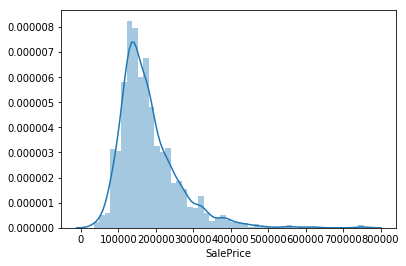

In [11]:
sns.distplot(train['SalePrice'])

In [12]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


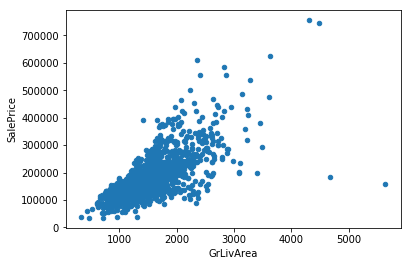

In [13]:
train.plot(x='GrLivArea',y='SalePrice',kind='scatter')

In [14]:
def listFactorVars(dataFrame):
    for col in dataFrame:
        if (len(train[col].unique()) < 15):
            print("{} : {}".format(col, train[col].unique()))
        else:
            None

catCols=listFactorVars(train)
display(catCols)

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
Alley : [nan 'Grvl' 'Pave']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual : [ 7  6  8  5  9  4 10  3  1  2]
OverallCond : [5 8 6 7 4 2 3 9 1]
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
MasVnrType : ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
ExterQual : ['Gd' 'TA' 'Ex' 'Fa']
ExterCond : ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Foundation : ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'St

None

In [15]:
# Finding the continuous numerical columns
ContCols = []
for col in train.select_dtypes(exclude=['O']).columns:
    if (len(train[col].unique()) >= 15):
        #print("{}".format(col))   
        ContCols.append(col)

print(ContCols)
train_contcols = train[ContCols]

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


In [16]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [17]:
train['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [18]:
train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [19]:
null_percent = round(train.isnull().sum()/train.shape[0] *100,3)

null_values = pd.concat([pd.DataFrame(train.isnull().sum(),columns=['value']), 
                          pd.DataFrame(null_percent,columns= ['percent'])],axis=1)

print(null_values[null_values['value'] > 0].sort_values('value'))
print('\n')
print(null_values[null_values['value'] > 0].sort_values('value').shape)

              value  percent
Electrical        1    0.068
MasVnrType        8    0.548
MasVnrArea        8    0.548
BsmtQual         37    2.534
BsmtCond         37    2.534
BsmtFinType1     37    2.534
BsmtExposure     38    2.603
BsmtFinType2     38    2.603
GarageCond       81    5.548
GarageQual       81    5.548
GarageFinish     81    5.548
GarageType       81    5.548
GarageYrBlt      81    5.548
LotFrontage     259   17.740
FireplaceQu     690   47.260
Fence          1179   80.753
Alley          1369   93.767
MiscFeature    1406   96.301
PoolQC         1453   99.521


(19, 2)


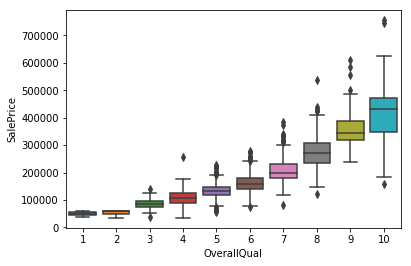

In [20]:
sns.boxplot(x='OverallQual',y='SalePrice',data=train)

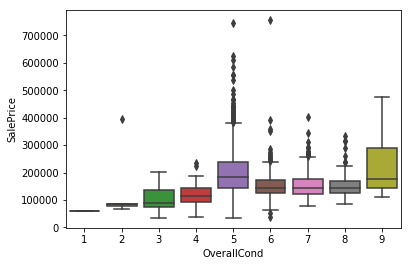

In [21]:
sns.boxplot(x='OverallCond',y='SalePrice',data=train)

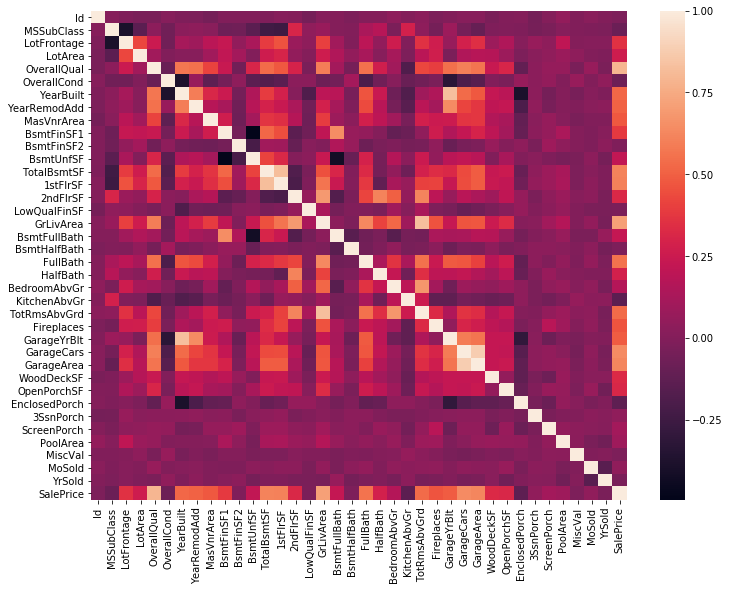

In [22]:
plt.subplots(figsize=(12, 9))
sns.heatmap(train.corr());

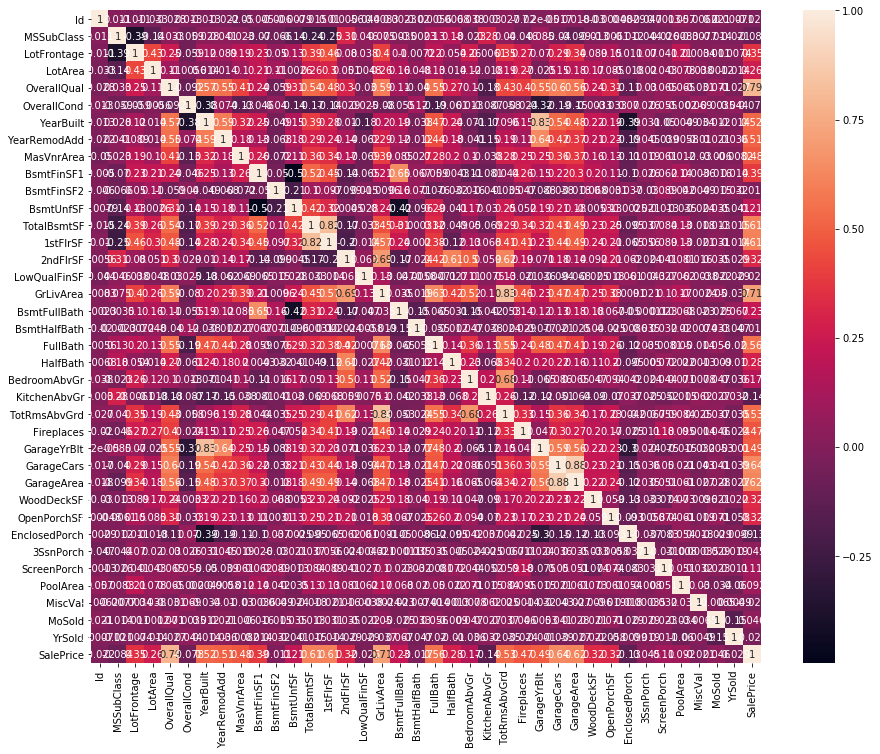

In [23]:
plt.subplots(figsize=(15, 12))
sns.heatmap(train.corr(),annot=True);

In [24]:
corrmat = train.corr()
print(corrmat.nlargest(15, 'SalePrice')['SalePrice'])
print('\n')
print(corrmat.nsmallest(15, 'SalePrice')['SalePrice'])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
Name: SalePrice, dtype: float64


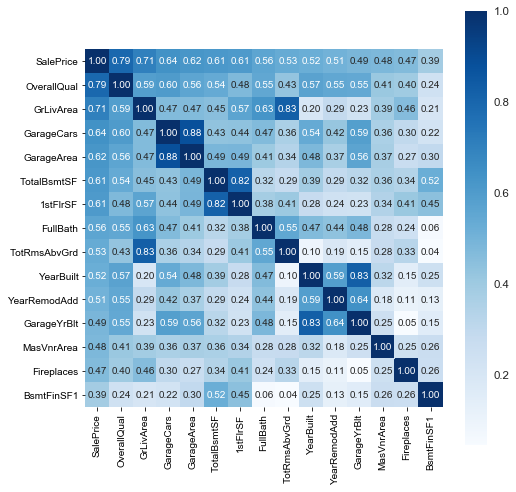

<Figure size 432x288 with 0 Axes>

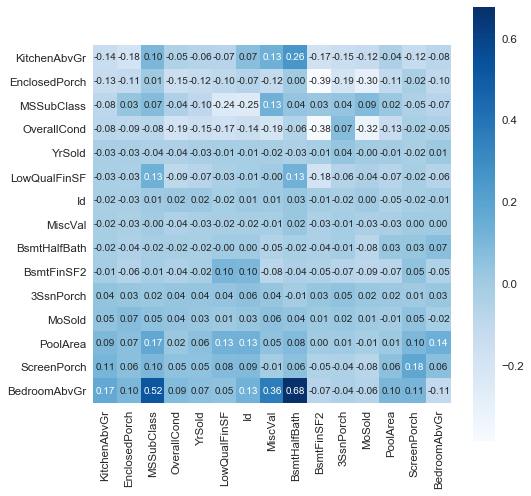

In [25]:
corrmat = train.corr()
# Number of features to include
k = 15
# find the column names having highest correlation with SalePrice
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# Subset the precomputed corrmat matrix containing with 15x15
zoommat = corrmat.nlargest(k, 'SalePrice')[cols]
# finally plot the zoomed heatmap
f, ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=1.15)
plot = sns.heatmap(zoommat, cbar=True, annot=True, square=True, cmap="Blues", fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)

cols1 = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index
zoommat1 = corrmat.nsmallest(k, 'SalePrice')[cols]

fig = plt.figure()
f, ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=1.15)
sns.heatmap(zoommat1, cbar=True, annot=True, square=True, cmap="Blues", fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols1.values, xticklabels=cols1.values)

In [26]:
zoommat1

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1
KitchenAbvGr,-0.135907,-0.183882,0.100063,-0.050634,-0.064433,-0.068901,0.068101,0.133115,0.256045,-0.174800,-0.149598,-0.124411,-0.037610,-0.123936,-0.081007
EnclosedPorch,-0.128578,-0.113937,0.009113,-0.151434,-0.121777,-0.095478,-0.065292,-0.115093,0.004151,-0.387268,-0.193919,-0.297003,-0.110204,-0.024822,-0.102303
MSSubClass,-0.084284,0.032628,0.074853,-0.040110,-0.098672,-0.238518,-0.251758,0.131608,0.040380,0.027850,0.040581,0.085072,0.022936,-0.045569,-0.069836
OverallCond,-0.077856,-0.091932,-0.079686,-0.185758,-0.151521,-0.171098,-0.144203,-0.194149,-0.057583,-0.375983,0.073741,-0.324297,-0.128101,-0.023820,-0.046231
YrSold,-0.028923,-0.027347,-0.036526,-0.039117,-0.027378,-0.014969,-0.013604,-0.019669,-0.034516,-0.013618,0.035743,-0.001014,-0.008201,-0.024096,0.014359
LowQualFinSF,-0.025606,-0.030429,0.134683,-0.094480,-0.067601,-0.033245,-0.014241,-0.000710,0.131185,-0.183784,-0.062419,-0.036363,-0.069071,-0.021272,-0.064503
Id,-0.021917,-0.028365,0.008273,0.016570,0.017634,-0.015415,0.010496,0.005587,0.027239,-0.012713,-0.021998,0.000072,-0.050298,-0.019772,-0.005024
MiscVal,-0.021190,-0.031406,-0.002416,-0.043080,-0.027400,-0.018479,-0.021096,-0.014290,0.024763,-0.034383,-0.010286,-0.032417,-0.029815,0.001409,0.003571
BsmtHalfBath,-0.016844,-0.040150,-0.018918,-0.020891,-0.024536,-0.000315,0.001956,-0.054536,-0.023836,-0.038162,-0.012337,-0.077464,0.026673,0.028976,0.067418
BsmtFinSF2,-0.011378,-0.059119,-0.009640,-0.038264,-0.018227,0.104810,0.097117,-0.076444,-0.035227,-0.049107,-0.067759,-0.088011,-0.072319,0.046921,-0.050117


In [27]:
train['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [117]:
#train[train['MiscFeature'].notnull()][['SalePrice','MiscFeature']].sort_values('SalePrice',ascending= False)

In [28]:
train['MiscFeature'].describe()

count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object

In [29]:
train[train['MiscFeature'].notnull()][['SalePrice','MiscFeature']].describe()

,SalePrice
count,54.000000
mean,151623.944444
std,52996.542694
min,55000.000000
25%,120125.000000
50%,146000.000000
75%,181750.000000
max,277000.000000


In [30]:
print(train['PoolQC'].value_counts())
print('\n')
print(train['PoolQC'].describe())

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object


In [31]:
train[train['PoolQC'].notnull()][['SalePrice','PoolQC']].describe()

,SalePrice
count,7.000000
mean,288138.571429
std,206071.850935
min,160000.000000
25%,176000.000000
50%,235000.000000
75%,262485.000000
max,745000.000000


In [32]:
print(train['GarageType'].value_counts())
print('\n')
print(train['GarageType'].describe())

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object


In [33]:
train[train['GarageType'].notnull()][['SalePrice','GarageType']].describe()

,SalePrice
count,1379.00000
mean,185479.51124
std,79023.89060
min,35311.00000
25%,134000.00000
50%,167500.00000
75%,217750.00000
max,755000.00000


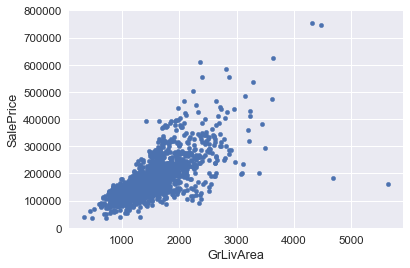

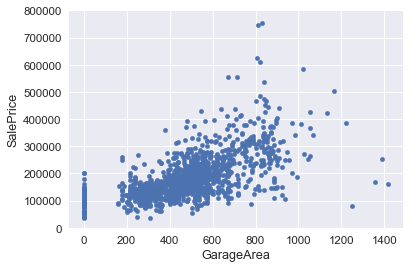

In [38]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

var = 'GarageArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [39]:
display(train[train['GarageArea']>1220])
display(train[train['GrLivArea']>4500])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [55]:
train = train.drop(train[train['Id'] == 1299].index)
#train = train.drop(train[train['Id'] == 524].index)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


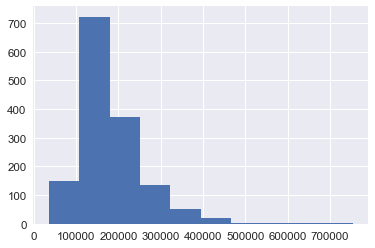

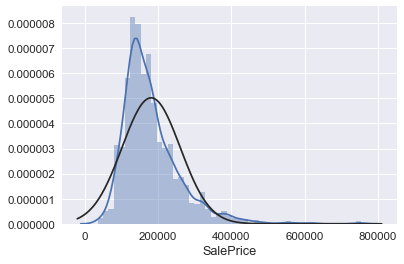

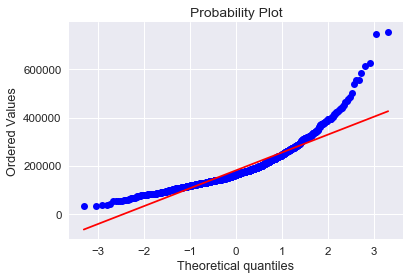

In [43]:
plt.hist(train['SalePrice'])
fig = plt.figure()
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


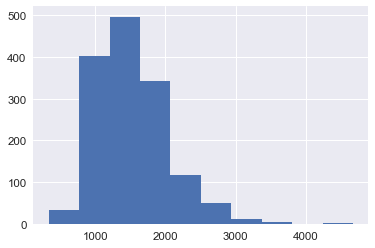

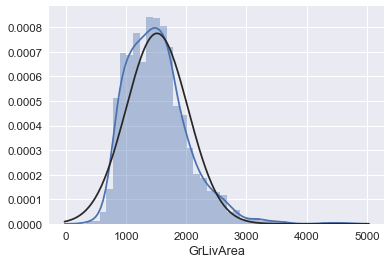

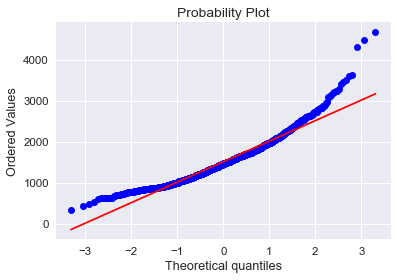

In [44]:
plt.hist(train['GrLivArea'])
fig = plt.figure()
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

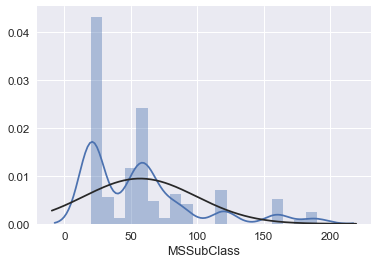

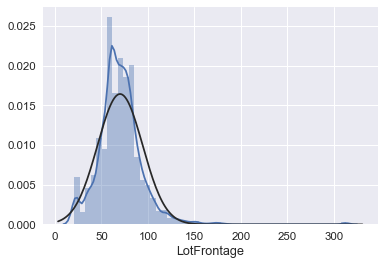

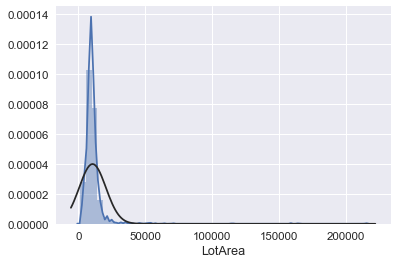

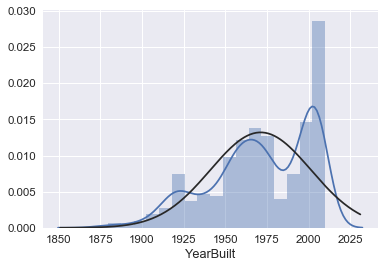

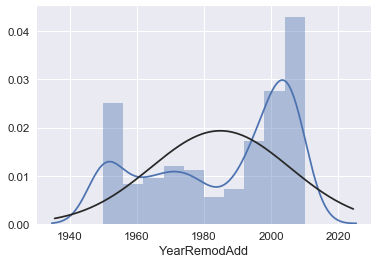

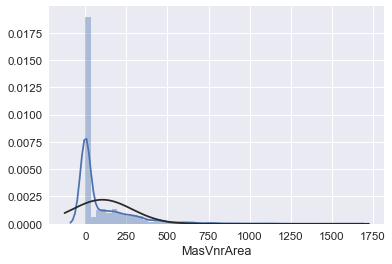

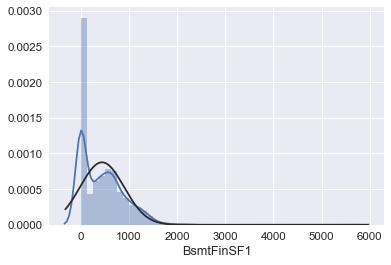

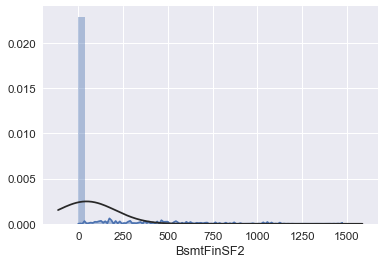

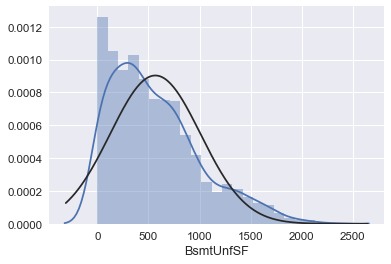

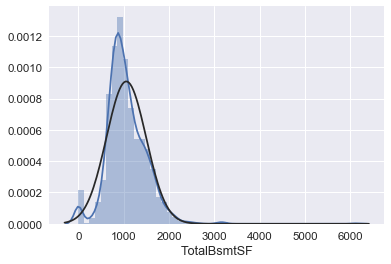

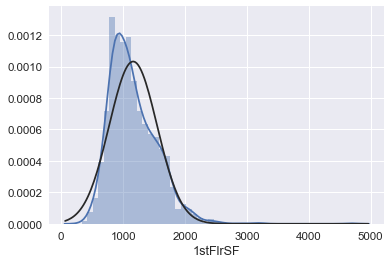

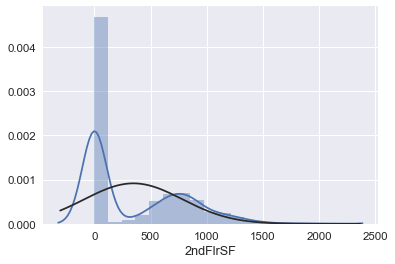

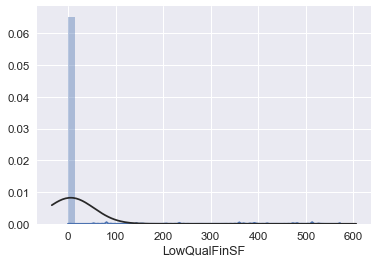

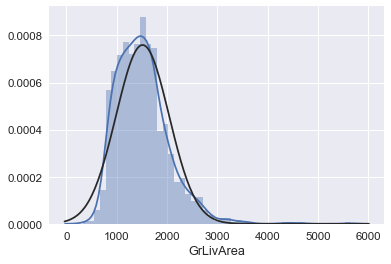

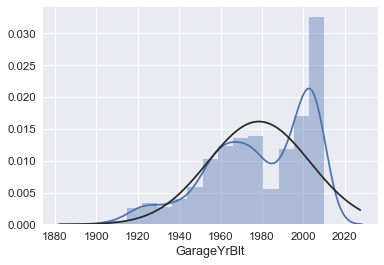

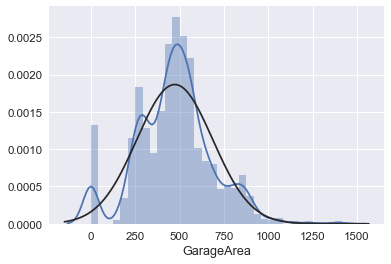

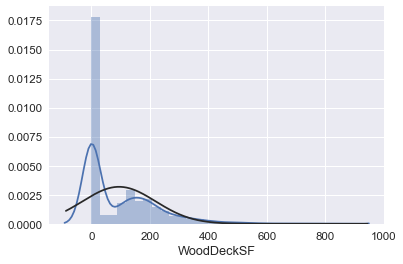

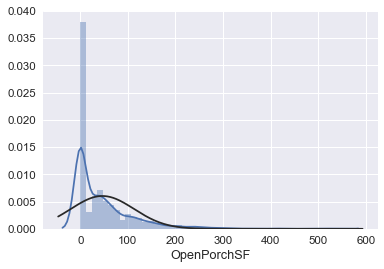

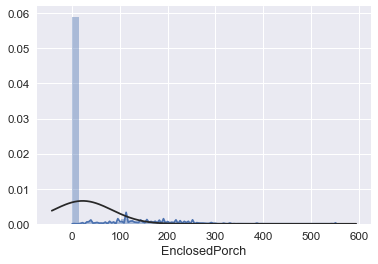

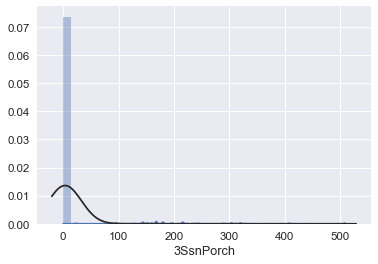

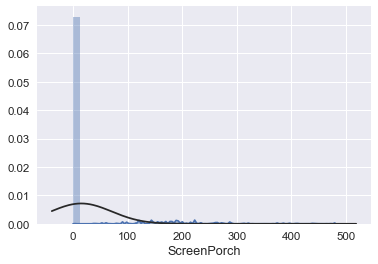

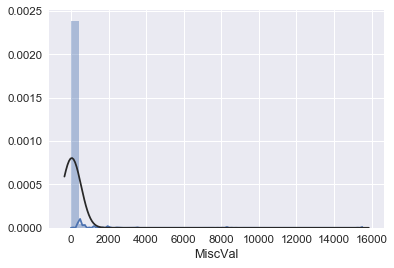

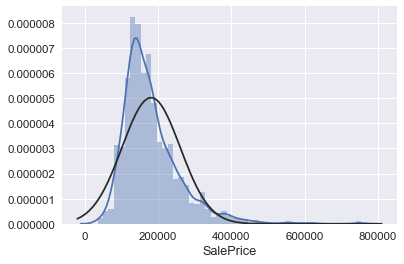

<Figure size 432x288 with 0 Axes>

In [45]:
#train_contcols.head()
for col in train_contcols.drop(columns=['Id']):
    sns.distplot(train_contcols[col].dropna(), fit=norm);   
    fig = plt.figure()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


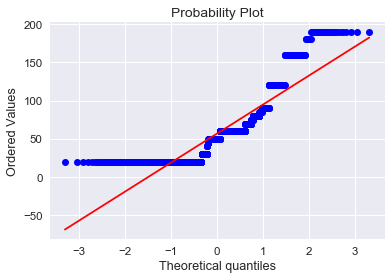

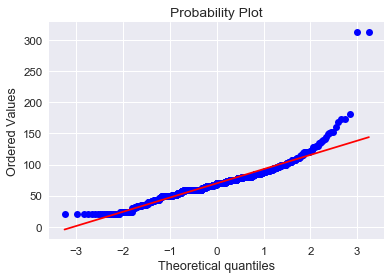

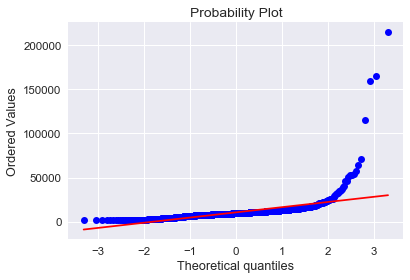

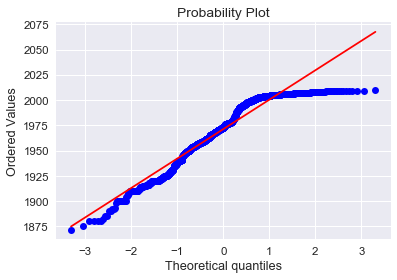

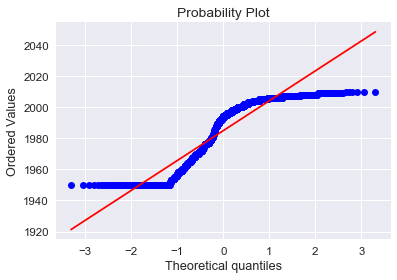

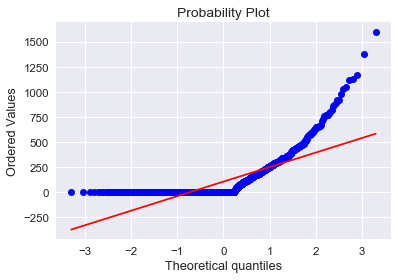

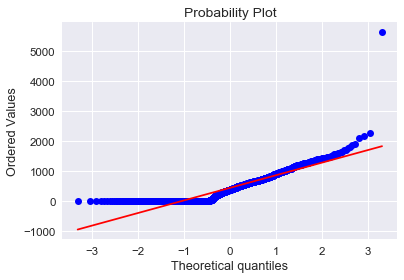

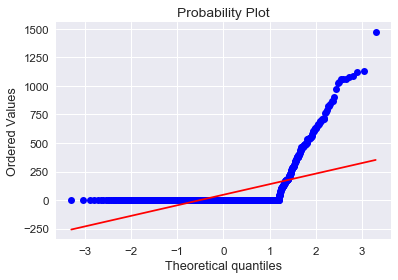

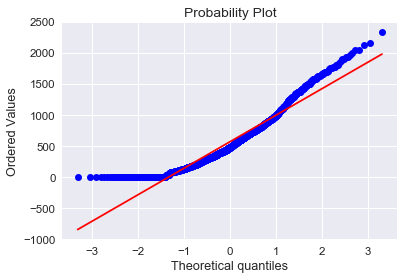

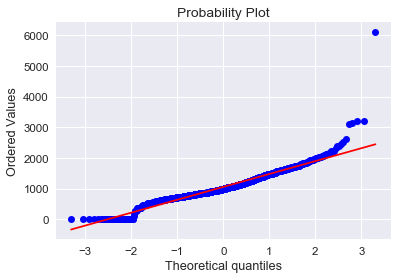

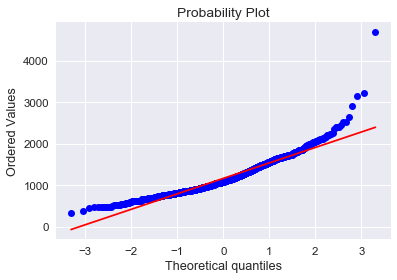

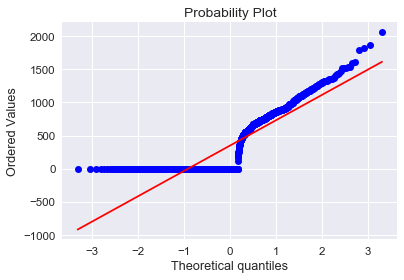

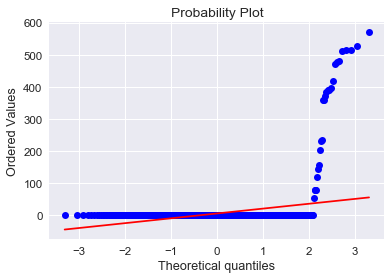

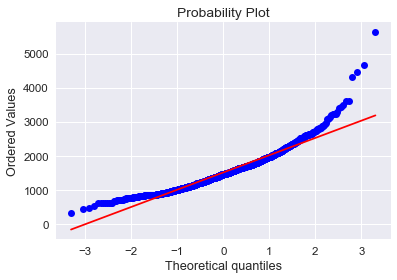

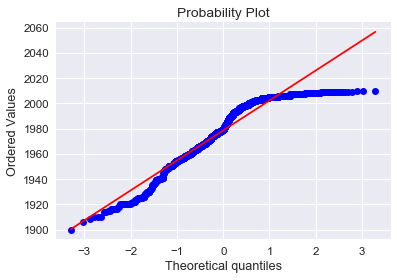

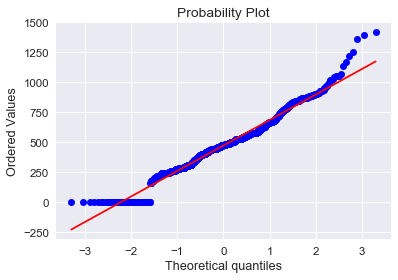

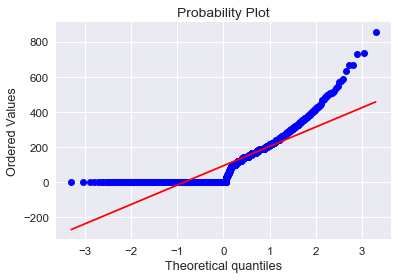

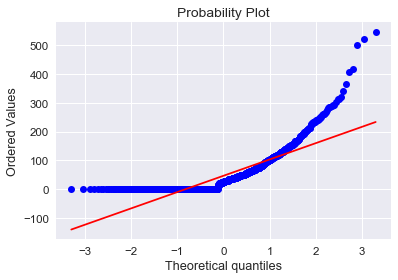

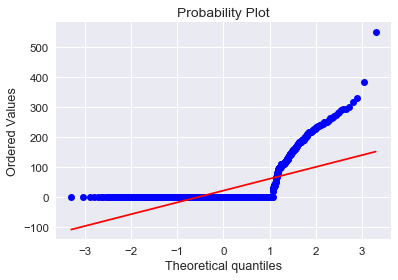

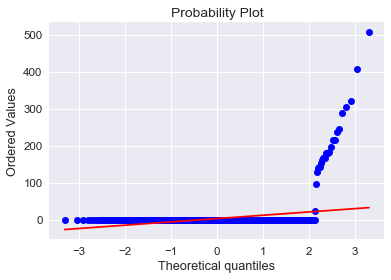

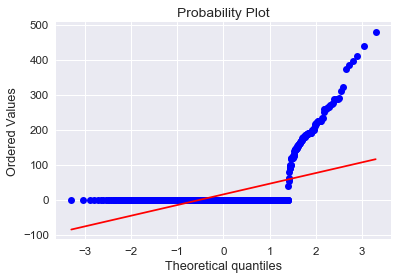

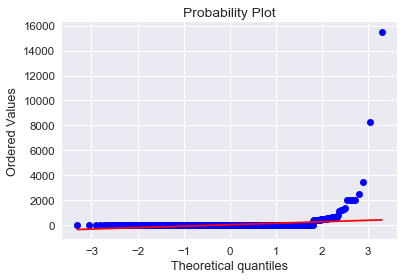

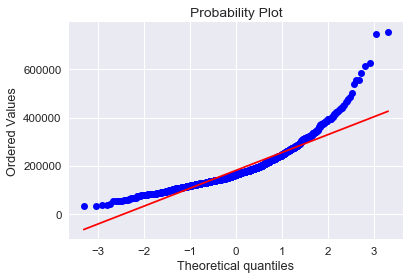

<Figure size 432x288 with 0 Axes>

In [46]:
for col in train_contcols.drop(columns=['Id']):
    res = stats.probplot(train_contcols[col].dropna(), plot=plt)
    fig = plt.figure()

In [47]:
print(train_contcols.isnull().sum().sort_values())
#print(null_values[null_values['value'] > 0].sort_values('value'))

Id                 0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
MiscVal            0
1stFlrSF           0
BsmtUnfSF          0
BsmtFinSF2         0
BsmtFinSF1         0
YearRemodAdd       0
YearBuilt          0
LotArea            0
MSSubClass         0
TotalBsmtSF        0
SalePrice          0
MasVnrArea         8
GarageYrBlt       81
LotFrontage      259
dtype: int64


In [56]:
#applying log transformation
cols = ['SalePrice','GrLivArea','MSSubClass','GarageArea']

for col in cols:
    train[col] = np.log(train[col])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 12.02 and sigma = 0.40



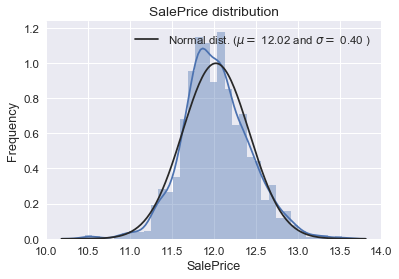

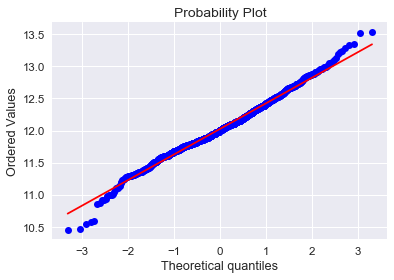

In [49]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3103: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


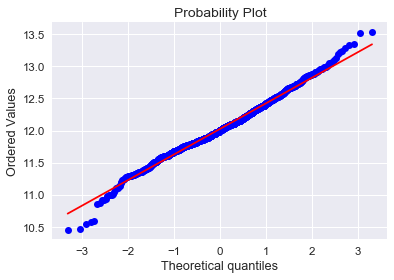

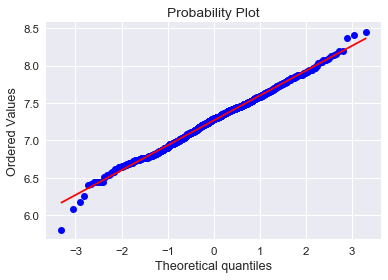

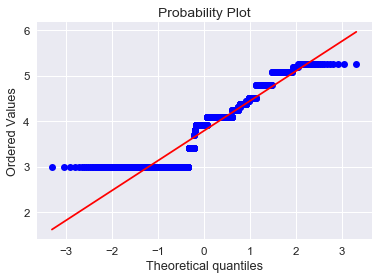

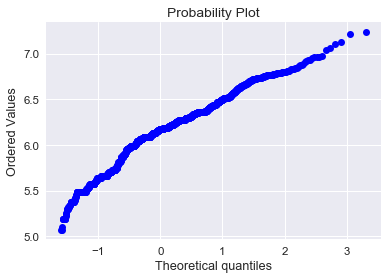

<Figure size 432x288 with 0 Axes>

In [57]:
for col in cols:
    res = stats.probplot(train[col], plot=plt)  
    fig = plt.figure()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


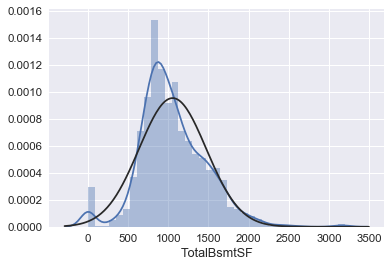

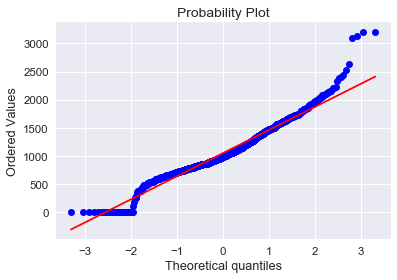

In [59]:
#histogram and normal probability plot
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [60]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [69]:
test['HasBsmt'] = pd.Series(len(test['TotalBsmtSF']), index=test.index)
test['HasBsmt'] = 0 
test.loc[test['TotalBsmtSF']>0,'HasBsmt'] = 1

In [61]:
#transform data
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])
train.loc[train['HasBsmt']==1,'BsmtUnfSF'] = np.log(train['BsmtUnfSF'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
cols = ['GrLivArea','MSSubClass','GarageArea']

for col in cols:
    test[col] = np.log(test[col])
    
test.loc[test['HasBsmt']==1,'TotalBsmtSF'] = np.log(test['TotalBsmtSF'])
test.loc[test['HasBsmt']==1,'BsmtUnfSF'] = np.log(test['BsmtUnfSF'])    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


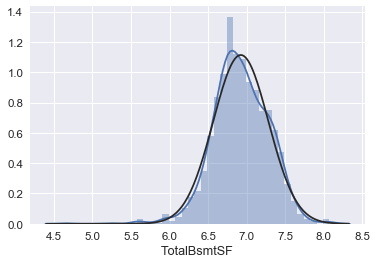

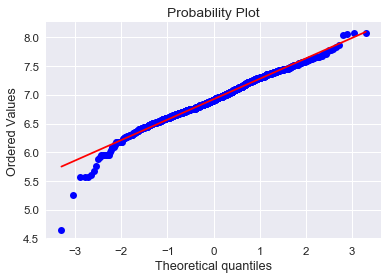

In [62]:
#histogram and normal probability plot
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)    

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


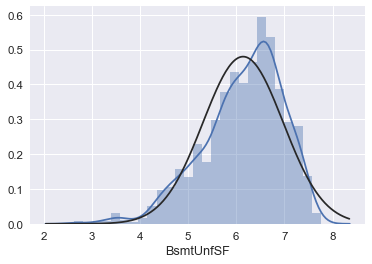

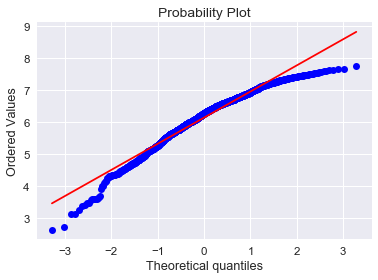

In [63]:
sns.distplot(train[train['BsmtUnfSF']>0]['BsmtUnfSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['BsmtUnfSF']>0]['BsmtUnfSF'], plot=plt)   

In [82]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasBsmt
0,2.995732,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,1
1,2.995732,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,1
2,4.094345,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,1
3,4.094345,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,1
4,4.787492,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,1


In [65]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [71]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
indata = pd.concat((train, test)).reset_index(drop=True)
indata.drop(['SalePrice'], axis=1, inplace=True)
print("indata size is : {}".format(indata.shape))

indata size is : (2918, 80)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [67]:
indata.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,6.752270,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,7.140453,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,6.824374,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,6.628041,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,7.043160,AllPub,192,2000,2000,2008


In [72]:
null_percent = round(indata.isnull().sum()/indata.shape[0] *100,3)

null_values = pd.concat([pd.DataFrame(indata.isnull().sum(),columns=['value']), 
                          pd.DataFrame(null_percent,columns= ['percent'])],axis=1)

print(null_values[null_values['value'] > 0].sort_values('value'))
print('\n')
print(null_values[null_values['value'] > 0].sort_values('value').shape)

              value  percent
SaleType          1    0.034
KitchenQual       1    0.034
BsmtFinSF1        1    0.034
BsmtFinSF2        1    0.034
GarageCars        1    0.034
GarageArea        1    0.034
TotalBsmtSF       1    0.034
Exterior2nd       1    0.034
Exterior1st       1    0.034
BsmtUnfSF         1    0.034
Electrical        1    0.034
Functional        2    0.069
Utilities         2    0.069
BsmtHalfBath      2    0.069
BsmtFullBath      2    0.069
MSZoning          4    0.137
MasVnrArea       23    0.788
MasVnrType       24    0.822
BsmtFinType1     79    2.707
BsmtFinType2     80    2.742
BsmtQual         81    2.776
BsmtCond         82    2.810
BsmtExposure     82    2.810
GarageType      157    5.380
GarageYrBlt     159    5.449
GarageFinish    159    5.449
GarageCond      159    5.449
GarageQual      159    5.449
LotFrontage     486   16.655
FireplaceQu    1420   48.663
Fence          2347   80.432
Alley          2720   93.215
MiscFeature    2813   96.402
PoolQC        

### Imputing missing values

In [73]:
indata["PoolQC"] = indata["PoolQC"].fillna("None")
indata["MiscFeature"] = indata["MiscFeature"].fillna("None")
indata["Alley"] = indata["Alley"].fillna("None")
indata["Fence"] = indata["Fence"].fillna("None")
indata["FireplaceQu"] = indata["FireplaceQu"].fillna("None")

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
indata["LotFrontage"] = indata.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    indata[col] = indata[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    indata[col] = indata[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    indata[col] = indata[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    indata[col] = indata[col].fillna('None')
    
indata["MasVnrType"] = indata["MasVnrType"].fillna("None")
indata["MasVnrArea"] = indata["MasVnrArea"].fillna(0)

indata['MSZoning'] = indata['MSZoning'].fillna(indata['MSZoning'].mode()[0])

indata = indata.drop(['Utilities'], axis=1)

indata["Functional"] = indata["Functional"].fillna("Typ")

indata['Electrical'] = indata['Electrical'].fillna(indata['Electrical'].mode()[0])

indata['KitchenQual'] = indata['KitchenQual'].fillna(indata['KitchenQual'].mode()[0])

indata['Exterior1st'] = indata['Exterior1st'].fillna(indata['Exterior1st'].mode()[0])
indata['Exterior2nd'] = indata['Exterior2nd'].fillna(indata['Exterior2nd'].mode()[0])

indata['SaleType'] = indata['SaleType'].fillna(indata['SaleType'].mode()[0])

indata['MSSubClass'] = indata['MSSubClass'].fillna("None")

In [76]:
indata.isnull().sum().max()

0

In [77]:
indata.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,Normal,WD,0,Pave,8,6.752270,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,Normal,WD,0,Pave,6,7.140453,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,Normal,WD,0,Pave,6,6.824374,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,Abnorml,WD,0,Pave,7,6.628041,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,Normal,WD,0,Pave,9,7.043160,192,2000,2000,2008


In [78]:
indata.shape

(2918, 79)

In [81]:
indata.to_csv('../Datasets/house_value_estimation/indata.csv')

In [79]:
#MSSubClass=The building class
indata['MSSubClass'] = indata['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
indata['OverallCond'] = indata['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
indata['YrSold'] = indata['YrSold'].astype(str)
indata['MoSold'] = indata['MoSold'].astype(str)

In [16]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


In [17]:
all_data[['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond']].head()

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond
0,3,2,4,5,5
1,5,2,4,5,5
2,5,2,4,5,5
3,2,4,1,5,5
4,5,2,4,5,5


In [18]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Skewed Features

In [19]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

In [20]:
numeric_feats

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence',
       'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual',
       'LandSlope', 'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC',
       'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold', 'TotalSF'],
      dtype='object')

In [21]:
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})

In [22]:
skewness.count()

Skew    59
dtype: int64

In [23]:
skewness.head()

,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065


### Box Cox Transformation of (highly) skewed features

In [24]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [25]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 221)


In [26]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [27]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.692623,11.686189,0.0,0.730463,1.540963,1.820334,1.540963,11.170327,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1
1,12.792276,0.000000,0.0,0.730463,1.540963,1.820334,0.730463,12.062832,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,11.892039,11.724598,0.0,0.730463,1.540963,1.820334,1.194318,10.200343,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1
3,12.013683,11.354094,0.0,0.730463,1.540963,0.730463,1.540963,8.274266,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,12.510588,12.271365,0.0,0.730463,1.820334,1.820334,0.000000,10.971129,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1
